In [ ]:
# The remakable anomaly collections

In [10]:
import sys

import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 15
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['axes.linewidth'] = 1.0
plt.rcParams['axes.grid'] = True

import warnings
warnings.filterwarnings('ignore')

sys.path.append('../')
from tsdr import tsdr
import lib.metrics

SLI_METRIC_NAME = 's-front-end_latency'

def read_metrics(filepath):
    data_df, _, metrics_meta = tsdr.read_metrics_json(filepath, interporate=False)
    chaos_type = metrics_meta['injected_chaos_type']
    chaos_comp = metrics_meta['chaos_injected_component']
    _, cause_metrics = lib.metrics.check_cause_metrics(list(data_df.columns), chaos_type, chaos_comp)
    return data_df, cause_metrics, chaos_type, chaos_comp


No handles with labels found to put in legend.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


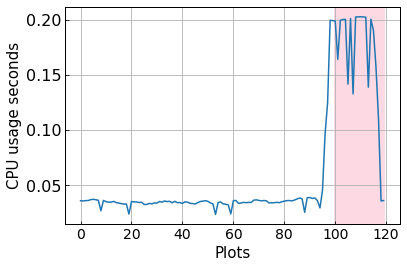

In [13]:
metrics, cause_metrics, ctype, ccomp = read_metrics('/tmp/sockshop/metrics-b2qdj-retrievd_20210904-2/2021-08-18-argowf-chaos-b2qdj-user-db_pod-cpu-hog_0.json')
cause_metric = f"c-{ccomp}_cpu_user_seconds_total"
samples = metrics[cause_metric].to_numpy()

start, end = 100, 120
color = "#f44174"
alpha = 0.2  # transparency of the colored background
# f = np.frompyfunc(lambda x: x/1024/1024, 1, 1)
plt.plot(samples)
plt.axvspan(max(0, start - 0.5), end - 0.5, facecolor=color, alpha=alpha)
plt.xlabel('Plots')
plt.ylabel('CPU usage seconds')
plt.legend(frameon=False, fontsize=16, loc="lower right")
plt.savefig(f"{cause_metric}.eps", transparent=True)
plt.show()

No handles with labels found to put in legend.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


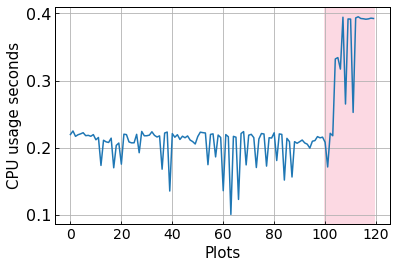

In [40]:
metrics, cause_metrics, ctype, ccomp = read_metrics('/tmp/sockshop/metrics-b2qdj-retrievd_20210904-2/2021-08-18-argowf-chaos-b2qdj-front-end_pod-cpu-hog_0.json')
cause_metric = f"c-{ccomp}_cpu_user_seconds_total"
samples = metrics[cause_metric].to_numpy()

start, end = 100, 120
color = "#f44174"
alpha = 0.2  # transparency of the colored background
# f = np.frompyfunc(lambda x: x/1024/1024, 1, 1)
plt.plot(samples)
plt.axvspan(max(0, start - 0.5), end - 0.5, facecolor=color, alpha=alpha)
plt.xlabel('Plots')
plt.ylabel('CPU usage seconds')
plt.legend(frameon=False, fontsize=16, loc="lower right")
plt.savefig(f"small_spikes_{cause_metric}.eps", transparent=True)
plt.show()

No handles with labels found to put in legend.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


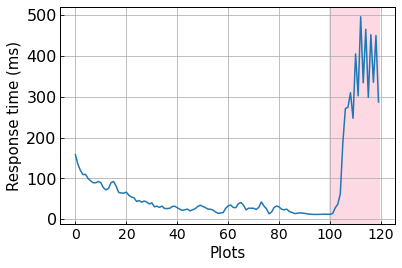

In [37]:
# stay behind the previous chaos
metrics, cause_metrics, ctype, ccomp = read_metrics('/tmp/sockshop/metrics-b2qdj-retrievd_20210904-2/2021-08-18-argowf-chaos-b2qdj-orders_pod-memory-hog_1.json')
cause_metric = f"s-front-end_latency"
samples = metrics[cause_metric].to_numpy()

start, end = 100, 120
color = "#f44174"
alpha = 0.2  # transparency of the colored background
f = np.frompyfunc(lambda x: x*1000, 1, 1)
plt.plot(f(samples))
plt.axvspan(max(0, start - 0.5), end - 0.5, facecolor=color, alpha=alpha)
plt.xlabel('Plots')
plt.ylabel('Response time (ms)')
plt.legend(frameon=False, fontsize=16, loc="lower right")
plt.savefig(f"stay-behind-the-previous-chaos_{cause_metric}.eps", transparent=True)
plt.show()

No handles with labels found to put in legend.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


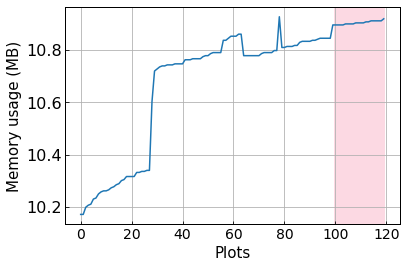

In [38]:
# increase slightly memory size
metrics, cause_metrics, ctype, ccomp = read_metrics('/tmp/sockshop/metrics-b2qdj-retrievd_20210904-2/2021-08-18-argowf-chaos-b2qdj-catalogue_pod-memory-hog_2.json')
cause_metric = f"c-{ccomp}_memory_working_set_bytes"
samples = metrics[cause_metric].to_numpy()

start, end = 100, 120
color = "#f44174"
alpha = 0.2  # transparency of the colored background
f = np.frompyfunc(lambda x: x/1024/1024, 1, 1)
plt.plot(f(samples))
plt.axvspan(max(0, start - 0.5), end - 0.5, facecolor=color, alpha=alpha)
plt.xlabel('Plots')
plt.ylabel('Memory usage (MB)')
plt.legend(frameon=False, fontsize=16, loc="lower right")
plt.savefig(f"increase-slightly_{cause_metric}.eps", transparent=True)
plt.show()

No handles with labels found to put in legend.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


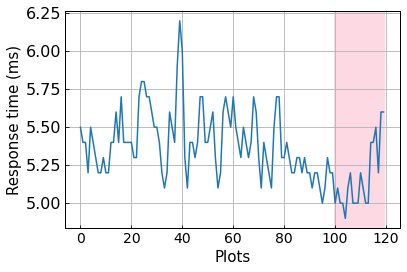

In [39]:
# close to flat
metrics, cause_metrics, ctype, ccomp = read_metrics('/tmp/sockshop/metrics-b2qdj-retrievd_20210904-2/2021-08-18-argowf-chaos-b2qdj-carts_pod-cpu-hog_2.json')
cause_metric = f"s-{ccomp}_latency"
samples = metrics[cause_metric].to_numpy()

start, end = 100, 120
color = "#f44174"
alpha = 0.2  # transparency of the colored background
f = np.frompyfunc(lambda x: x*1000, 1, 1)
plt.plot(f(samples))
plt.axvspan(max(0, start - 0.5), end - 0.5, facecolor=color, alpha=alpha)
plt.xlabel('Plots')
plt.ylabel('Response time (ms)')
plt.legend(frameon=False, fontsize=16, loc="lower right")
plt.savefig(f"close-to-flag_{cause_metric}.eps", transparent=True)
plt.show()